# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
# %matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [11]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()
# import os
# print(os.getcwd())

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
df_aggregated=df.groupby("Year").mean()
df_aggregated

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


## 2. Univariate Analysis

Analyze each climate variable independently.


----Univariate Analysis for Global Average Temperature (°C)----


Descriptive statistics of Global Average Temperature (°C):

count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64


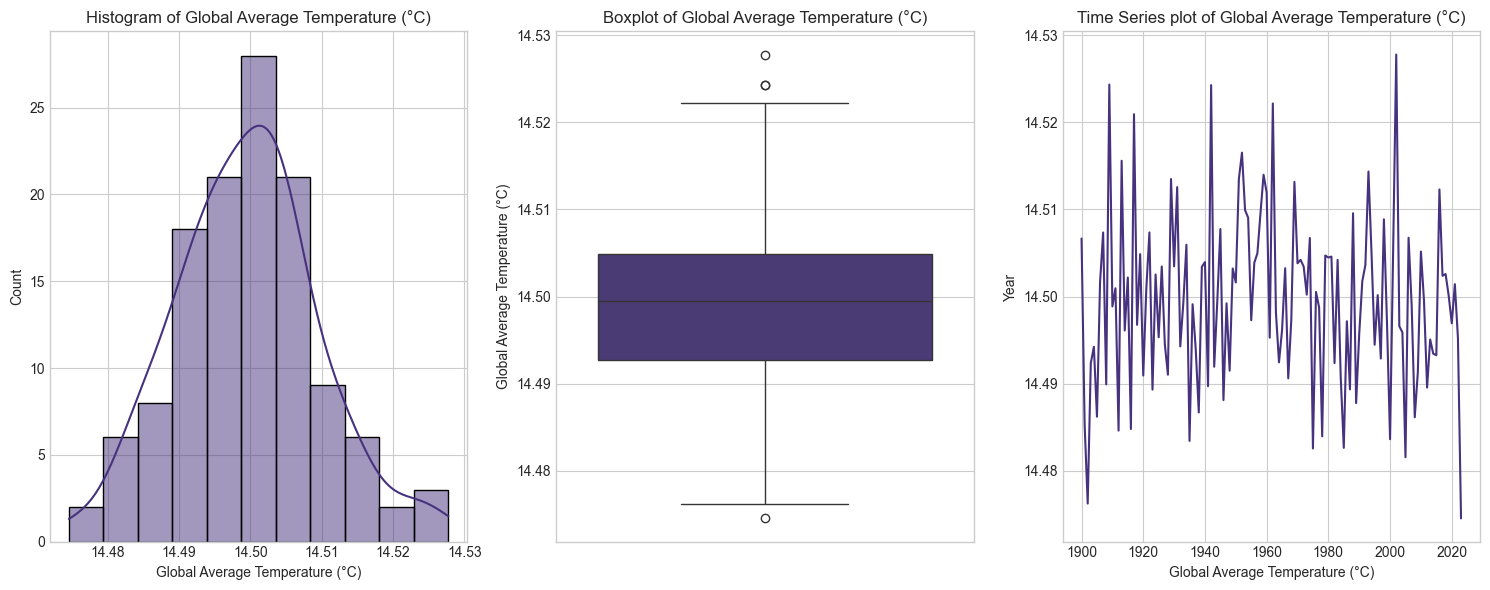


----Univariate Analysis for CO2 Concentration (ppm)----


Descriptive statistics of CO2 Concentration (ppm):

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64


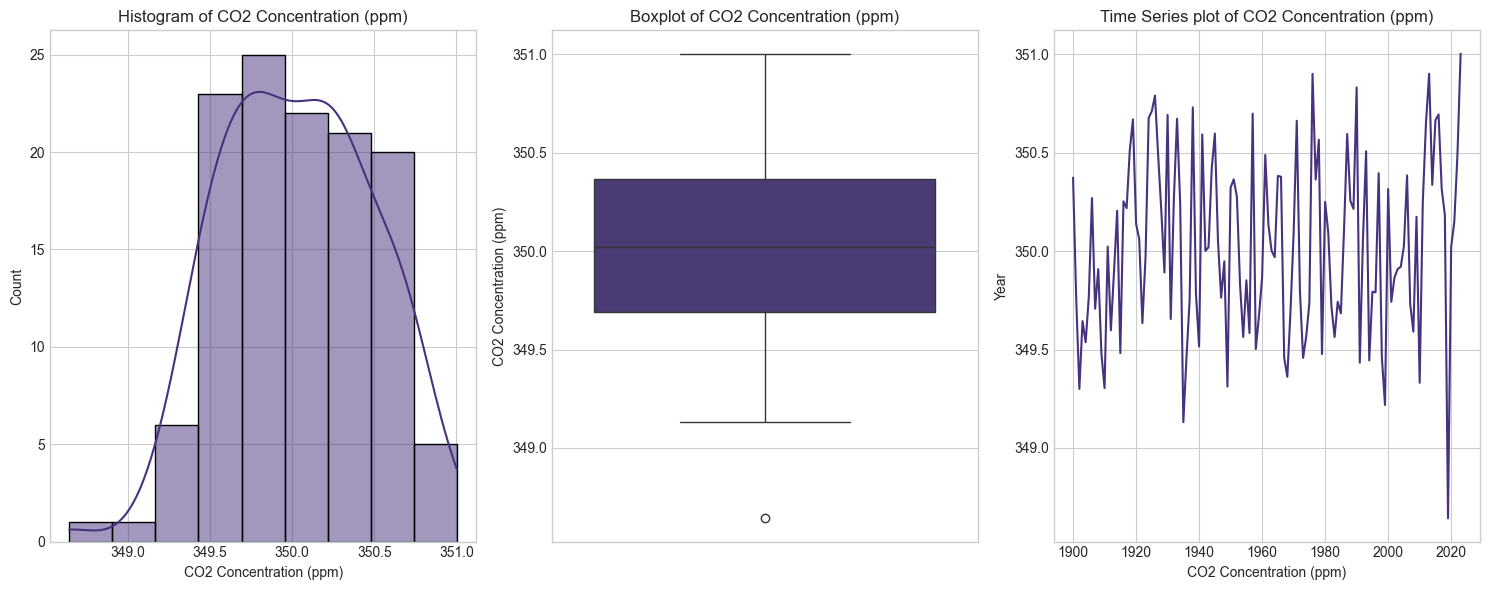


----Univariate Analysis for Sea Level Rise (mm)----


Descriptive statistics of Sea Level Rise (mm):

count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64


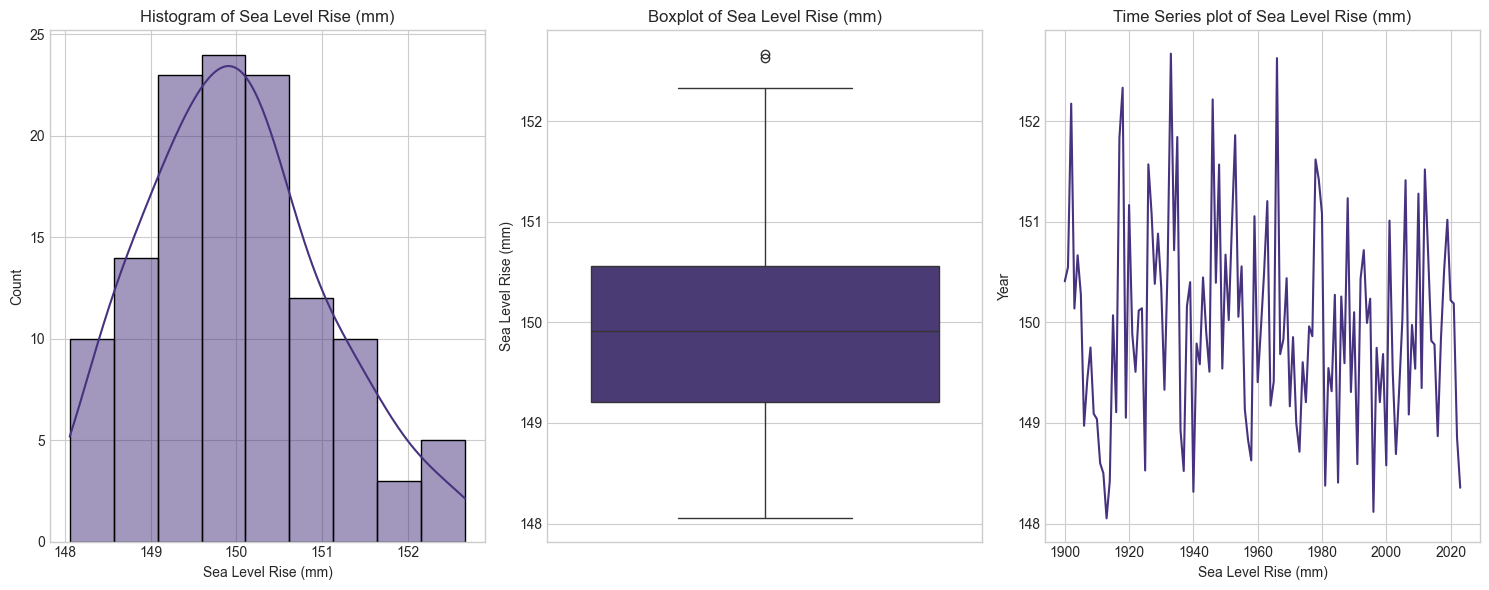


----Univariate Analysis for Arctic Ice Area (million km²)----


Descriptive statistics of Arctic Ice Area (million km²):

count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


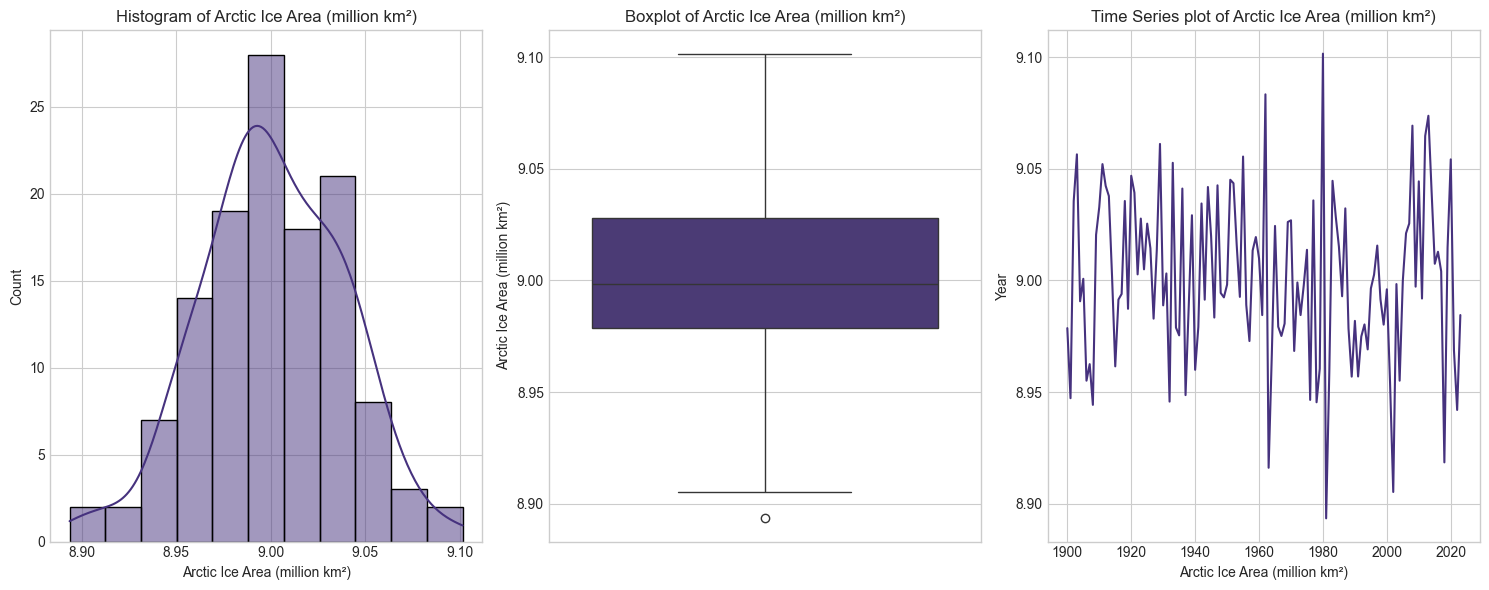

In [5]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
climate_variables = df_aggregated.columns

for variable in climate_variables:
    print(f"\n----Univariate Analysis for {variable}----\n")

    #Descriptive statistics
    print(f"\nDescriptive statistics of {variable}:\n")
    print(df_aggregated[variable].describe())

    plt.figure(figsize=(15,6))

    #Histogram
    plt.subplot(1,3,1)
    sns.histplot(df_aggregated[variable],kde=True)
    plt.title(f"Histogram of {variable}")
   

    #Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(y=df_aggregated[variable])
    plt.title(f"Boxplot of {variable}")
   

    #Time Series Plot
    plt.subplot(1,3,3)
    plt.plot(df_aggregated.index,df_aggregated[variable])
    plt.title(f"Time Series plot of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Year")

    plt.tight_layout()
    plt.show()
    


    
 

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

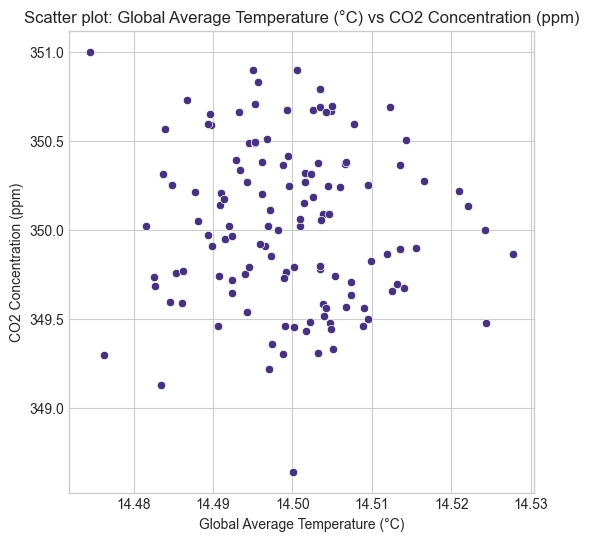

Correlation between Global Average Temperature (°C) and CO2 Concentration (ppm) : -0.068
Weak negative correlation
Interpretation: None


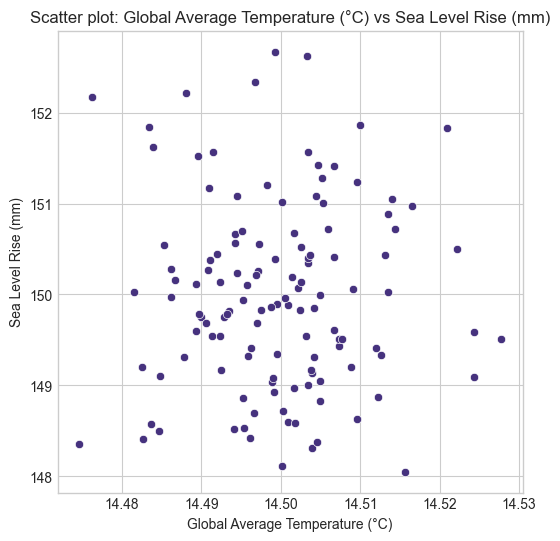

Correlation between Global Average Temperature (°C) and Sea Level Rise (mm) :  0.004
Weak positive correlation
Interpretation: None


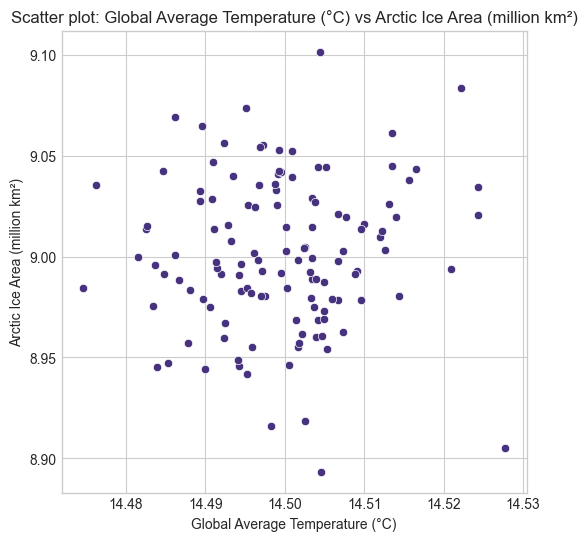

Correlation between Global Average Temperature (°C) and Arctic Ice Area (million km²) :  0.047
Weak positive correlation
Interpretation: None


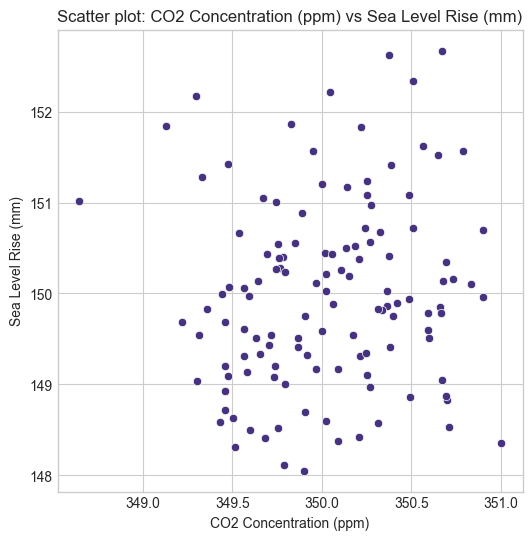

Correlation between CO2 Concentration (ppm) and Sea Level Rise (mm) :  0.098
Weak positive correlation
Interpretation: None


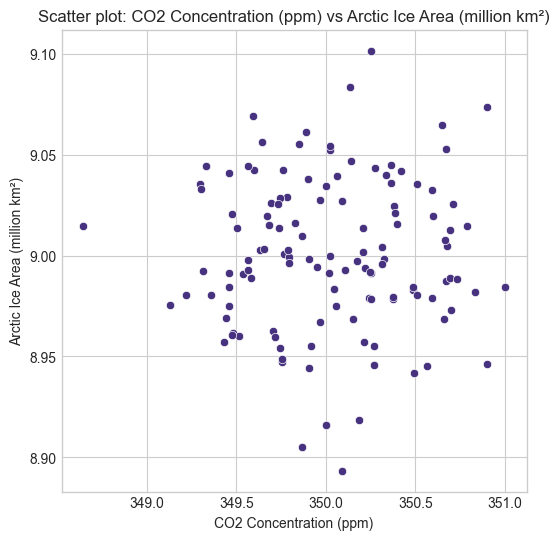

Correlation between CO2 Concentration (ppm) and Arctic Ice Area (million km²) :  0.010
Weak positive correlation
Interpretation: None


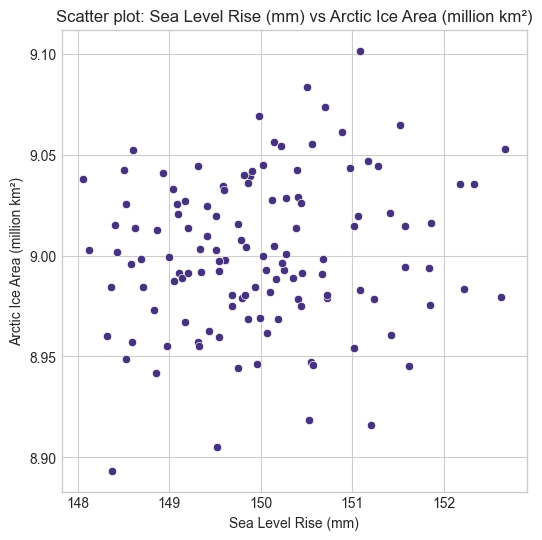

Correlation between Sea Level Rise (mm) and Arctic Ice Area (million km²) :  0.130
Weak positive correlation
Interpretation: None


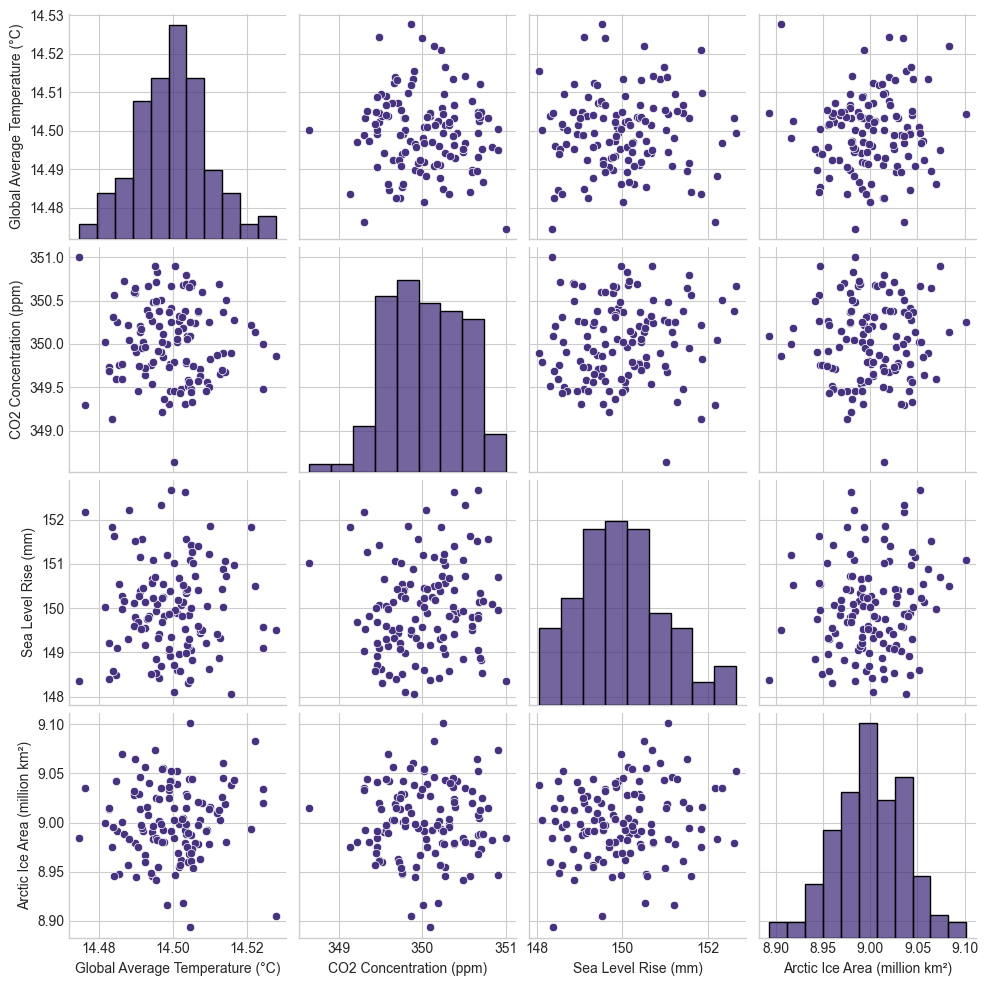

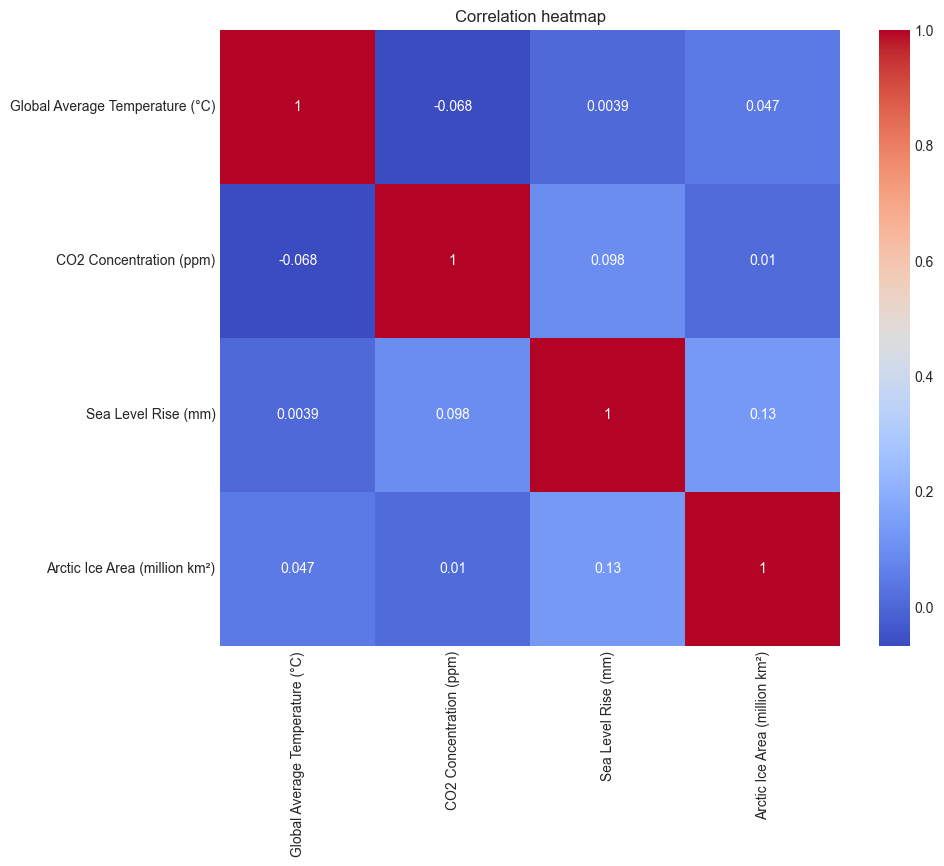

In [6]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations

# Function to interpret correlation coefficients
def get_correlation_interpretation(correlation):
    if correlation >=0.7:
        print("Strong positive correlation")
    elif correlation >=0.3:
        print("Moderate positive correlation")
    elif correlation >=0:
        print("Weak positive correlation")
    elif correlation <=-0.7:
        print("Strong negative correlation")
    elif correlation <=-0.3:
        print("Moderate negative correlation")
    elif correlation <=0:
        print("Weak negative correlation")
    else:
        print("No correlation")

#Scatter plot
for i in range(len(climate_variables)):
    for j in range(i+1,len(climate_variables)):
        var1=climate_variables[i]
        var2=climate_variables[j]

        #Scatter plot
        plt.figure(figsize=(6,6))
        sns.scatterplot(x=df_aggregated[var1],y=df_aggregated[var2])
        plt.title(f"Scatter plot: {var1} vs {var2}")
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.grid(True)
        plt.show()

        #Correlation calculation
        correlation=df_aggregated[var1].corr(df_aggregated[var2])
        print(f"Correlation between {var1} and {var2} : {correlation: .3f}")
        print(f"Interpretation: {get_correlation_interpretation(correlation)}")

#Pair plot
sns.pairplot(df_aggregated)
plt.show()

#correlation heatmap
plt.figure(figsize=(10,8))
correlation_matrix=df_aggregated.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()




## 4. Multivariate Analysis

Investigate relationships among three or more variables.

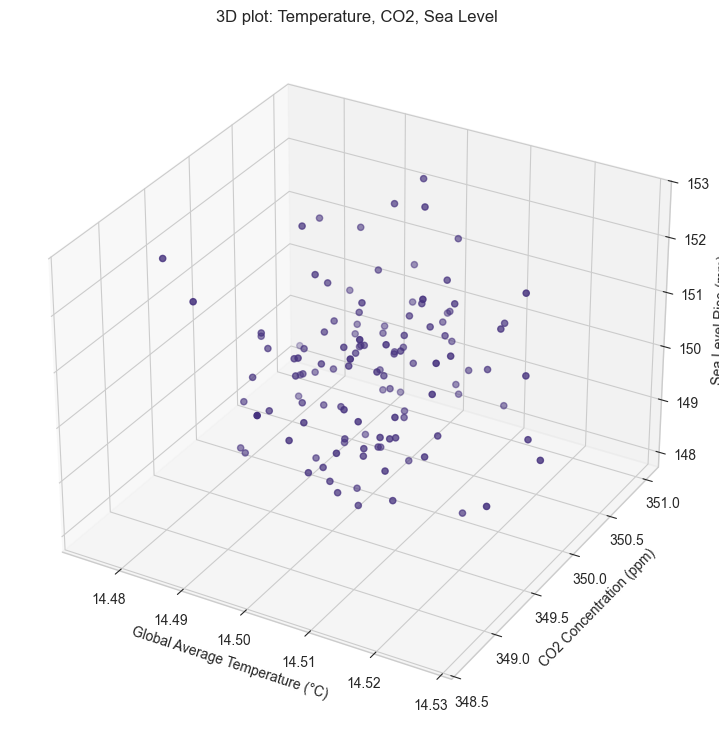

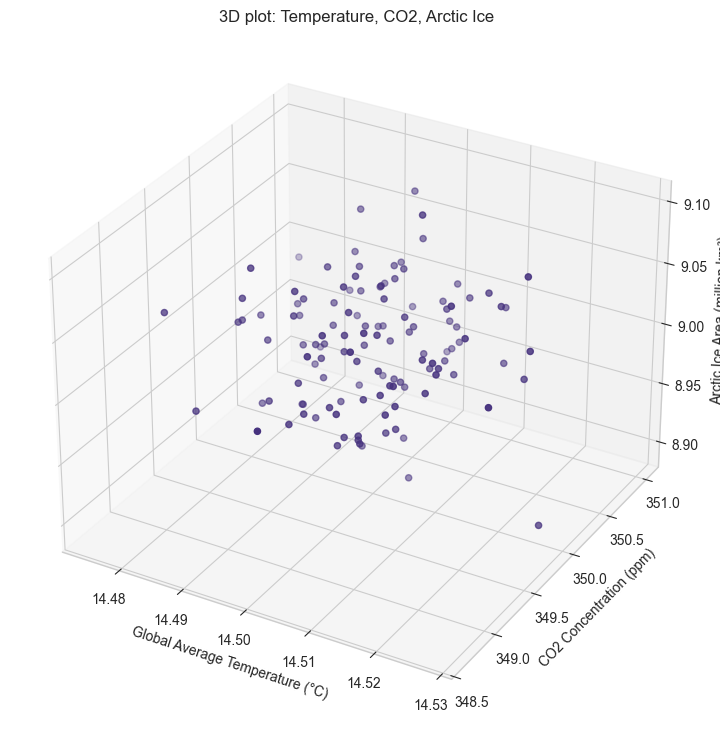

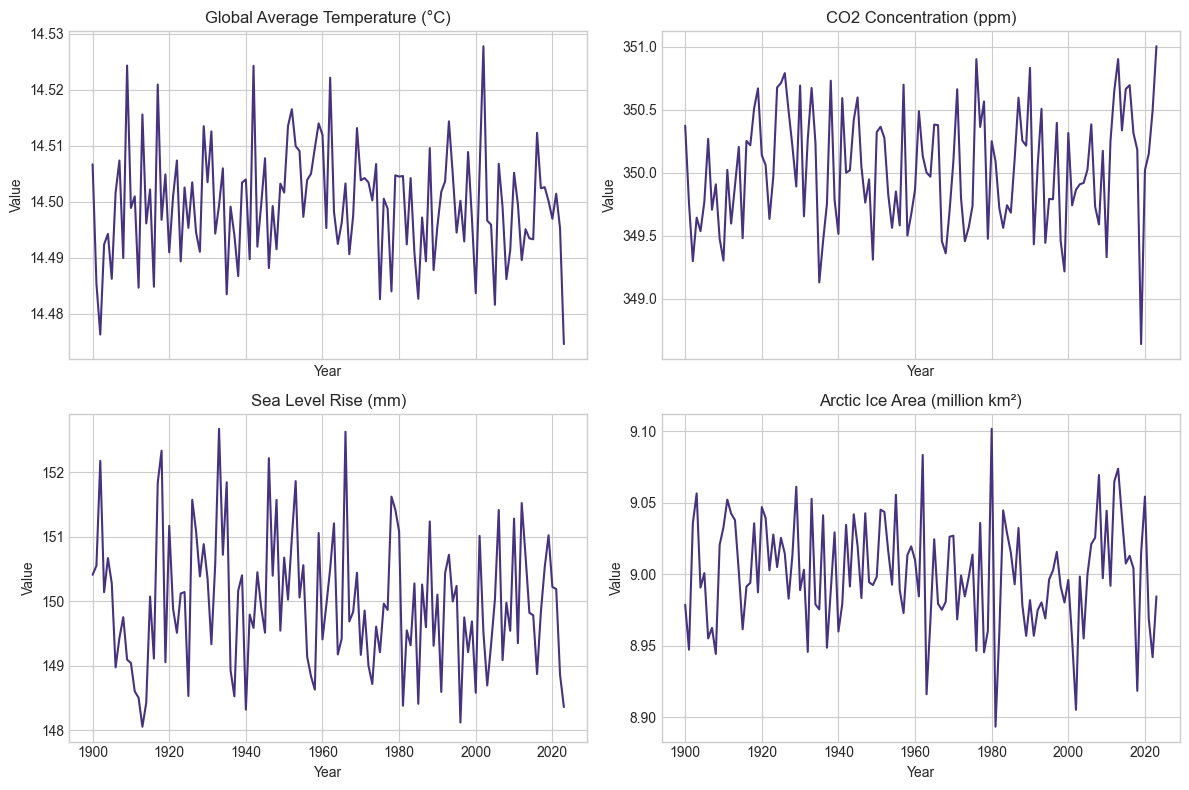

In [7]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
# Multivariate Analysis

#3D scatter plot

fig1=plt.figure(figsize=(12,9))
ax=fig1.add_subplot(111,projection='3d')
ax.scatter(df_aggregated['Global Average Temperature (°C)'],df_aggregated['CO2 Concentration (ppm)'],df_aggregated['Sea Level Rise (mm)'])
ax.set_xlabel('Global Average Temperature (°C)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Sea Level Rise (mm)')
ax.set_title('3D plot: Temperature, CO2, Sea Level')


fig2=plt.figure(figsize=(12,9))
ax=fig2.add_subplot(111,projection='3d')
ax.scatter(df_aggregated['Global Average Temperature (°C)'],df_aggregated['CO2 Concentration (ppm)'],df_aggregated['Arctic Ice Area (million km²)'])
ax.set_xlabel('Global Average Temperature (°C)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Arctic Ice Area (million km²)')
ax.set_title('3D plot: Temperature, CO2, Arctic Ice')
plt.show()
#Multiple Small multiples (Time Series Facets)
fig,axes=plt.subplots(2,2,figsize=(12,8),sharex=True)
climate_variables=df_aggregated.columns
for i,ax in enumerate(axes.flatten()):
    ax.plot(df_aggregated.index,df_aggregated[climate_variables[i]])
    ax.set_title(climate_variables[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
fig.tight_layout()
plt.show()




## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# Univariate analysis
### a) Over the time period of 124 years , the average global temperature is 14.5 C with standard deviation of 0.0099 which indicates low variability within dataset and most values are similar to mean value.
### b) The mean CO2 concentration is 350 ppm with  standard deviation of 0.4565 indicates data are somewhat spreaded from mean value but not so excessively.Over last decades CO2 concentration seems to be gradually increasing.
### c) The average sea level rise is 149.99 mm with standard deviation of 1.03 (moderate). Time series plot indicates that over last 3 or 4 decades there is decrease in rise in sea level than previous decades.
### d) The average arctic ice area is 9 million sq. km with standard deviatin of 0.037 indicates decreasing trend of arctic ice over last few decades suggesting increase in sea level and global warming .

# Bivariate analysis
### a) The highest positive correlation is between arctice ice area reduction and sea level rise(0.13) which makes complete sense meaning with reduction in ice area there is rise in sea level.
### b) The correlation heatmap also shows potential link between co2 concentration rise and sea level rise.

# Multivariate analysis
### CO2 concentration, global average temperature and sea level rise are correlated. Increase in CO2 concentration results in increase in global average temperature which results in melting of ice and thus rise in sea level.


# TODO: Write your conclusions here